In [11]:
import numpy as np
import pandas as pd
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import jieba
import jieba.analyse
import jieba.posseg as pseg

In [13]:
# 阅读文件，输出内容
news_file = open("C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Avalon Ding\\Kaikeba\\L4\\news.txt", "r")
file_content = news_file.read()
#print(nba_file.read())

In [3]:
# 用textrank4zh输出关键词和摘要
# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=file_content, lower=True, window=2)
print('关键词：')
for item in tr4w.get_keywords(20, word_min_len=1):
    print(item.word, item.weight)
    
# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=file_content, lower=True, source = 'no_stop_words')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

关键词：
土耳其 0.04069520917096793
美国 0.0369142527418084
说 0.02446922676052611
没有 0.023786570392058257
袭击 0.017700149279091273
特种部队 0.017412575896103233
炮击 0.017115219350455936
遭到 0.016625479650103248
报道 0.01588545076733542
进行 0.015360109277853728
官员 0.01289429340340466
新闻周刊 0.0124159192792039
军队 0.012101622809814312
炮弹 0.011975939251251714
还击 0.011652728049471862
观察哨 0.011553223050069785
边境 0.01152755141124453
城市 0.01117250958722105
科巴 0.01117250958722105
山丘 0.01117250958722105
摘要：
2 0.08495356931796437 五角大楼一名高级官员说，土耳其军队的炮击非常猛烈，美国人员曾考虑进行还击是出于自卫
5 0.07766422471111947 《新闻周刊》此前曾在周三报道说，目前美国军队的交战规则仍然以自卫为中心，五角大楼还没有发布全面撤出叙利亚的命令
6 0.07567905031674357 这名五角大楼官员说，土耳其部队应该了解美国的位置，不过，这名官员没有具体说明在场人员的确切人数，但表示大约在15到100人之间


In [8]:
# 用jieba工具包获取关键词
# 获取分词
seg_list = jieba.cut(file_content, cut_all=False)
print(' '.join(seg_list))
print('-'*100)
# 获取分词和词性
words = pseg.cut(file_content)
for word, flag in words:
    print('%s, %s' % (word, flag))
print('-'*100)

# 通过TF-IDF获取关键词
keywords = jieba.analyse.extract_tags(file_content, topK=20, withWeight=True, allowPOS=('n','nr','ns'))
for item in keywords:
    print(item[0],item[1])
print('-'*100)

# 基于TextRank算法的关键词抽取
keywords = jieba.analyse.textrank(file_content, topK=20, withWeight=True, allowPOS=('n', 'ns')) 
#print(keywords)
#print('-'*100)
for item in keywords:
    print(item[0],item[1])

土耳其 未 炮击 美军   土耳其 向 美军 开战 
 当地 时间 11 日 ， 一支 美国 特种部队 遭到 了 土耳其 的 炮弹 袭击 ， 《 新闻周刊 》 称 这 明显 是 “ 误伤 ” 。 五角大楼 一名 高级官员 说 ， 土耳其 军队 的 炮击 非常 猛烈 ， 美国 人员 曾 考虑 进行 还击 是 出于 自卫 。 
 《 新闻周刊 》 10 月 11 日 报道 ， 一名 库尔德 情报 官员 和 五角大楼 官员 均 表示 ， 在 库尔德人 占多数 的 城市 科巴 尼 的 山上 ， 这支 特种部队 在 执行 任务 时 遭到 炮击 ， 炮弹 落 在 离 驻扎地 几百米 远 的 地方 ， 没有 美国士兵 受伤 。 
 报道 称 ， 特种部队 没有 还击 ， 而是 在 炮击 停止 后 撤退 。 《 新闻周刊 》 此前 曾 在 周三 报道 说 ， 目前 美国 军队 的 交战 规则 仍然 以 自卫 为 中心 ， 五角大楼 还 没有 发布 全面 撤出 叙利亚 的 命令 。 
 这名 五角大楼 官员 说 ， 土耳其 部队 应该 了解 美国 的 位置 ， 不过 ， 这名 官员 没有 具体 说明 在场 人员 的 确切 人数 ， 但 表示 大约 在 15 到 100 人 之间 。 《 新闻周刊 》 已 联系 五角大楼 就 此事 发表 评论 。 
 土耳其 国防部 针对 《 新闻周刊 》 的 报道 发表 了 一份 声明 ， 否认 土耳其 军队 针对 美国 军队 。 土耳其 国防部 证实 说 ， “ 土耳其 在 苏鲁 奇 以南 的 边境 哨所 ， 受到 了 来自 美国 一个 观察哨 西南 方向 大约 1 千米 处 山丘 的 迫击炮 攻击 。 ” 
 为了 自卫 ， 双方 对 袭击 的 恐怖分子 阵地 进行 了 还击 。 土耳其 没有 以 任何 方式 向 美国 观察哨 开火 。 他 说 ： 所有 的 预防措施 都 是 在 开火 之前 采取 的 ， 目的 是 防止 对 美军基地 造成 任何 伤害 。 作为 预防措施 ， 我们 在 收到 来自 美国 的 信息 后 立即 停火 。 我们 坚决 反对 美国 或 联军部队 遭到 袭击 的 说法 。 
 特朗普 周四 曾 在 社交 媒体 上 表示 ， 他 有 “ 三种 选择 之一 ： 派遣 数千名 士兵 并 在 军事 上 取胜 ， 在经济上 对 土耳

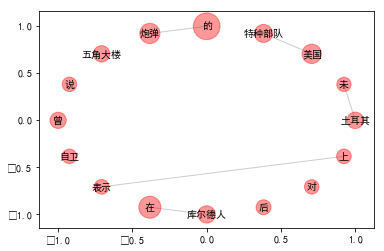

In [121]:
# 用networkx尝试绘制news数据关键词网络图
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文

# 获取非数字分词
list_temp = []
words = pseg.cut(file_content)
for word, flag in words:
    if 'm' not in '{}'.format(flag):
        list_temp.append(word)
        
from collections import defaultdict
# 设置遍的权重等于配对的次数，window = 2，然后对分词做前后配对
edges_weights_temp = defaultdict(list)
for x in list_temp:
    temp = (x, list_temp[list_temp.index('{}'.format(x))+1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

# 生成非标点词性单词组
target_words = []
words = pseg.cut(file_content)
for word, flag in words:
    if "x" not in '{}'.format(flag):
        if 'm' not in '{}'.format(flag):
            target_words.append(word)

# 基于上方非标点词组，删除原始分词配对中包括标点的配对
words4graph = []
for key, val in edges_weights_temp.items():
    if key[0] in target_words:
        if key[1] in target_words:
            words4graph.append(key)

# 为新的分词配对赋值原始权重
edges_weights_news = defaultdict(list)
for x in words4graph:
    edges_weights_news[x] = edges_weights_temp[x]
    
edges_weights_news = [(key[0], key[1], val) for key, val in edges_weights_news.items()]

def show_graph(graph, type = 'spring_layout'):
    if type == 'spring_layout':
        # 使用Spring Layout布局，类似中心放射状
        positions=nx.spring_layout(graph)
    if type == 'circular_layout':
        # 使用Circular Layout布局，在一个圆环上均匀分布
        positions=nx.circular_layout(graph)

    # 设置网络图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出news数据中的所有分词关系图
    plt.show()
    
# 创建一个无向图
graph = nx.Graph()
graph.add_weighted_edges_from(edges_weights_news)
# 计算每个节点的PR值，并作为节点的pagerank属性
pagerank = nx.pagerank(graph)
# 获取每个节点的pagerank数值
pagerank_list = {node: rank for node, rank in pagerank.items()}
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank_list)
# 画网络图
#show_graph(graph)

# 将完整的图谱进行精简
# 设置PR值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.01
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉PR值小于pagerank_threshold的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph, 'circular_layout')

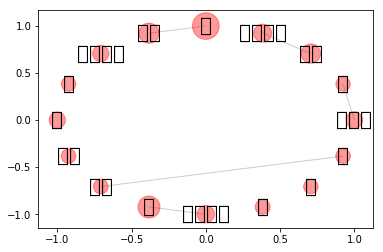